## Data modelling

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#load data
df = pd.read_csv('../data/cleaned/data_with_outliers.csv')

df

sqft_above  sqft_lot15  sqft_living15  waterfront  view  condition  \
0       -0.737418   -0.341970      -1.043506           0     0          3   
1        0.705741    0.057869      -0.294277           0     0          3   
2       -1.882200    0.126750       1.121919           0     0          3   
3       -1.038881   -0.511161      -0.994463           0     0          5   
4        0.125114    0.034741      -0.097540           0     0          3   
...           ...         ...            ...         ...   ...        ...   
21592   -0.096146   -2.414324      -0.610480           0     0          3   
21593    0.842224   -0.018655      -0.046444           0     0          3   
21594   -1.115067   -1.918077      -1.977481           0     0          3   
21595    0.010309   -2.704055      -0.875644           0     0          3   
21596   -1.115067   -2.606580      -1.977481           0     0          3   

       grade  bedrooms  bathrooms  sqft_basement_cat  floors  yr_built_cat  \
0          7         3       1.00                  1     1.0             1   
1          7         3       2.25                  2     2.0             1   
2          6         2       1.00                  1     1.0             1   
3          7         4       3.00                  3     1.0             1   
4          8         3       2.00                  1     1.0             1   
...      ...       ...        ...                ...     ...           ...   
21592      8         3       2.50                  1     3.0             2   
21593      8         4       2.50                  1     2.0             3   
21594      7         2       0.75                  1     2.0             2   
21595      8         3       2.50                  1     2.0             2   
21596      7         2       0.75                  1     2.0             2   

       zip   price  bathrooms_cat  
0        1  221900              0  
1        1  538000              1  
2        0  180000              0  
3        1  604000              1  
4        0  510000              1  
...    ...     ...            ...  
21592    1  360000              1  
21593    1  400000              1  
21594    1  402101              0  
21595    0  400000              1  
21596    1  325000              0  

[21597 rows x 15 columns]

In [4]:
#drop bathrooms
df = df.drop([ 'bathrooms'], axis=1)

In [5]:
#define data
X = df.drop(['price'], axis=1)
y = df['price']

In [6]:
X.head()

sqft_above  sqft_lot15  sqft_living15  waterfront  view  condition  grade  \
0   -0.737418   -0.341970      -1.043506           0     0          3      7   
1    0.705741    0.057869      -0.294277           0     0          3      7   
2   -1.882200    0.126750       1.121919           0     0          3      6   
3   -1.038881   -0.511161      -0.994463           0     0          5      7   
4    0.125114    0.034741      -0.097540           0     0          3      8   

   bedrooms  sqft_basement_cat  floors  yr_built_cat  zip  bathrooms_cat  
0         3                  1     1.0             1    1              0  
1         3                  2     2.0             1    1              1  
2         2                  1     1.0             1    0              0  
3         4                  3     1.0             1    1              1  
4         3                  1     1.0             1    0              1

In [7]:
X.columns

Index(['sqft_above', 'sqft_lot15', 'sqft_living15', 'waterfront', 'view',
       'condition', 'grade', 'bedrooms', 'sqft_basement_cat', 'floors',
       'yr_built_cat', 'zip', 'bathrooms_cat'],
      dtype='object')

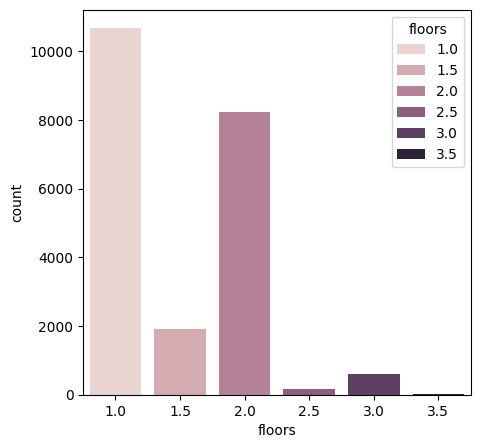

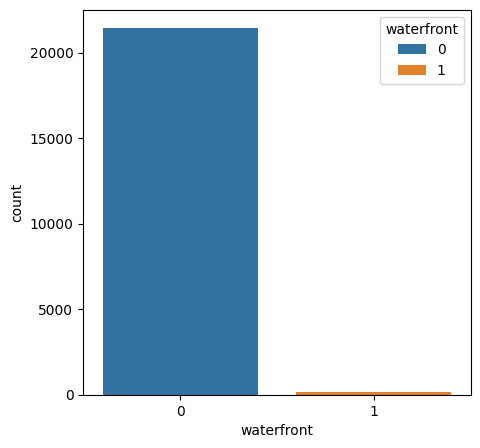

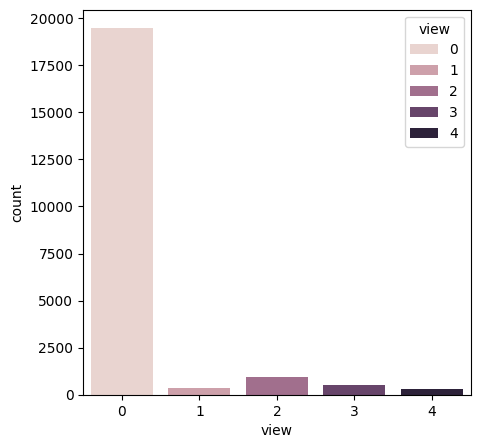

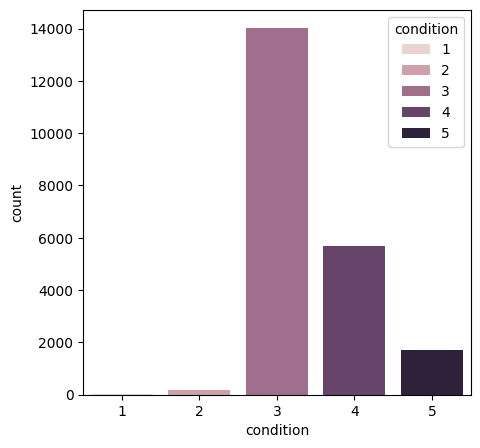

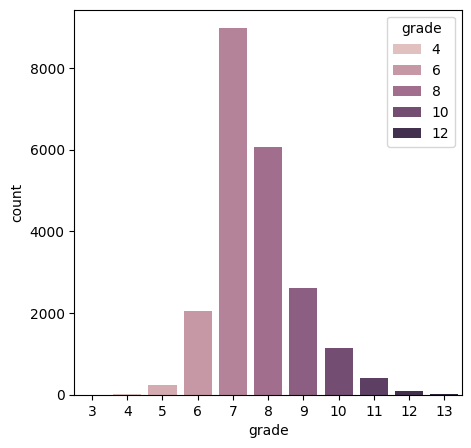

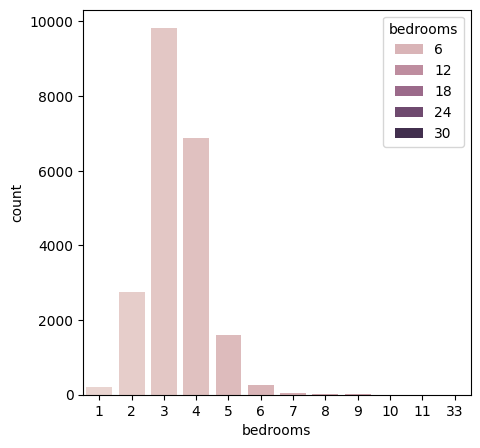

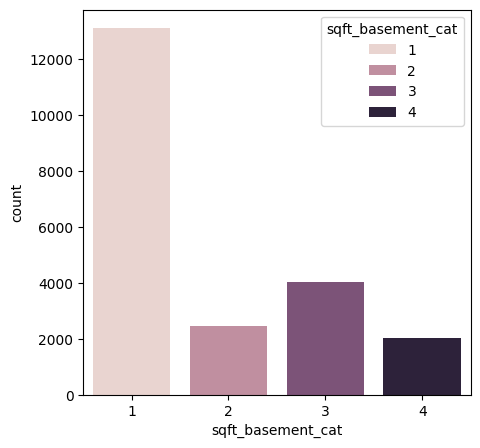

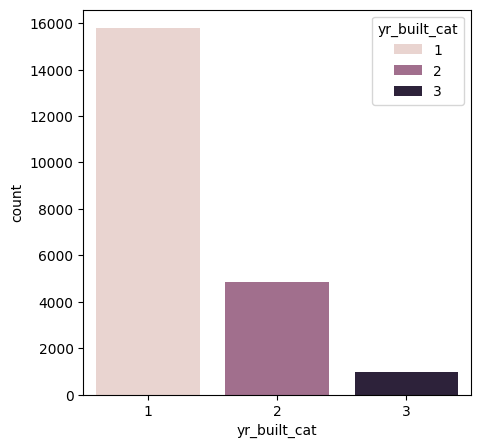

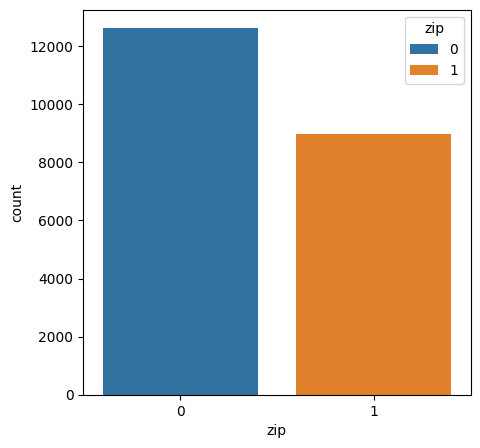

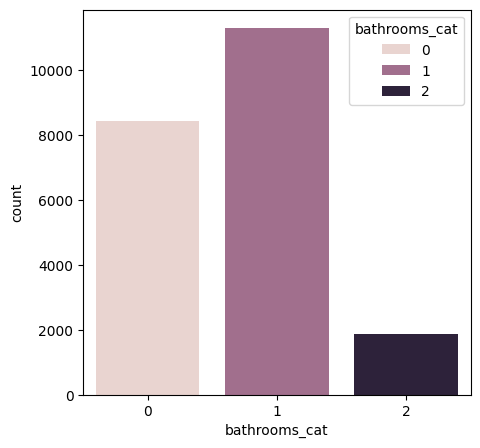

In [8]:
list_to = [ 'floors', 'waterfront','view','condition', 'grade', 'bedrooms', 'sqft_basement_cat', 'yr_built_cat','zip', 'bathrooms_cat']
#we are going to see value count in plot for these data

for i in list_to:
    plt.figure(figsize=(5,5))
    sns.countplot(x=i,hue=i, data=df)
    plt.show()



Now we are going to split the data into train and test set using sklearn, with test_size =0.3, and a random_state=42

In [9]:
#split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3,
                                                    random_state=42)

After our split,we will first convert to a datafram, ensure to minmax scale to reduce range of our training and test set before we fit our model

In [10]:
#convert train and test data to dataframe
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)

In [11]:
#now to scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(X_train_df)


MinMaxScaler()

In [12]:
#save the scaler
import pickle
path="../scalers/"
scaler_file_name= "min_max_scaler_with_outliers.pkl"

with open(path + scaler_file_name, 'wb') as file:
    pickle.dump(scaler, file)

In [13]:
#transform the data
X_train_scaled = scaler.transform(X_train_df)
X_test_scaled = scaler.transform(X_test_df)

#convert the scaled data to dataframe
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

In [14]:
X_train_scaled_df.head()

sqft_above  sqft_lot15  sqft_living15  waterfront  view  condition  grade  \
0    0.667315    0.489966       0.639177         0.0   0.0        0.5    0.5   
1    0.747725    0.599973       0.707338         1.0   1.0        0.5    0.7   
2    0.573054    0.497993       0.622095         0.0   0.0        0.5    0.5   
3    0.596722    0.525203       0.620131         0.0   0.5        0.5    0.4   
4    0.717457    0.440688       0.556414         0.0   0.0        0.5    0.4   

   bedrooms  sqft_basement_cat  floors  yr_built_cat  zip  bathrooms_cat  
0       0.1                0.0     0.0           0.5  0.0            0.5  
1       0.3                0.0     0.4           0.5  1.0            1.0  
2       0.2                0.0     0.4           0.0  0.0            0.5  
3       0.3                0.0     0.0           0.0  0.0            0.5  
4       0.7                0.0     0.0           0.0  0.0            0.5

In [15]:
X_train_scaled_df.describe().T

count      mean       std  min       25%       50%  \
sqft_above         15117.0  0.548148  0.132593  0.0  0.455666  0.542911   
sqft_lot15         15117.0  0.506887  0.125589  0.0  0.446259  0.513485   
sqft_living15      15117.0  0.637443  0.112406  0.0  0.558860  0.633598   
waterfront         15117.0  0.007740  0.087637  0.0  0.000000  0.000000   
view               15117.0  0.058345  0.192095  0.0  0.000000  0.000000   
condition          15117.0  0.602302  0.162705  0.0  0.500000  0.500000   
grade              15117.0  0.466071  0.117205  0.0  0.400000  0.400000   
bedrooms           15117.0  0.237600  0.090917  0.0  0.200000  0.200000   
sqft_basement_cat  15117.0  0.256202  0.352065  0.0  0.000000  0.000000   
floors             15117.0  0.198545  0.216379  0.0  0.000000  0.200000   
yr_built_cat       15117.0  0.156909  0.274779  0.0  0.000000  0.000000   
zip                15117.0  0.416948  0.493070  0.0  0.000000  0.000000   
bathrooms_cat      15117.0  0.349573  0.311308  0.0  0.000000  0.500000   

                        75%  max  
sqft_above         0.648662  1.0  
sqft_lot15         0.557151  1.0  
sqft_living15      0.717197  1.0  
waterfront         0.000000  1.0  
view               0.000000  1.0  
condition          0.750000  1.0  
grade              0.500000  1.0  
bedrooms           0.300000  1.0  
sqft_basement_cat  0.666667  1.0  
floors             0.400000  1.0  
yr_built_cat       0.500000  1.0  
zip                1.000000  1.0  
bathrooms_cat      0.500000  1.0

Now to build the model, we will use Linear regression because we are meant to predict price of the real estate .
Linear regression is great for price prediction as it predicts numerical values

In [16]:
#now to build the model
from sklearn.linear_model import LinearRegression

In [17]:
linear_model = LinearRegression()
linear_model.fit(X_train_scaled_df, y_train)

LinearRegression()

In [18]:
#save model
path="../models/"
model_file_name= "linear_model_with_outliers.pkl"

with open(path + model_file_name, 'wb') as file:
    pickle.dump(linear_model, file)

Evaluate model
we will compare against real value and then subsequently we will check with metrics such as accuracy score etc

In [19]:
y_train_pred = linear_model.predict(X_train_scaled_df)
y_test_pred = linear_model.predict(X_test_scaled_df)

In [20]:
y_train_pred = [round(value, 2) for value in y_train_pred]
y_test_pred= [round(value, 2) for value in y_test_pred]

# Create a dictionary with the results
results = {
    "Set": ["Train"] * len(X_train) + ["Test"] * len(X_test),
    "Real": list(y_train) + list(y_test),
    "Predicted": y_train_pred + y_test_pred
}

# Create the results DataFrame
results_df = pd.DataFrame(results)


In [21]:
results_df

Set     Real   Predicted
0      Train   699800   538574.31
1      Train  1700000  1896274.78
2      Train   258000   491382.66
3      Train   245000   475366.12
4      Train   373000   389843.73
...      ...      ...         ...
21592   Test  1010000   844198.56
21593   Test   675000  1020878.74
21594   Test   442500   309030.72
21595   Test   424950   540808.69
21596   Test   356000   247989.14

[21597 rows x 3 columns]

In [22]:
#show error
results_df['Errors'] = results_df['Real'] - results_df['Predicted']
display(results_df)

Set     Real   Predicted     Errors
0      Train   699800   538574.31  161225.69
1      Train  1700000  1896274.78 -196274.78
2      Train   258000   491382.66 -233382.66
3      Train   245000   475366.12 -230366.12
4      Train   373000   389843.73  -16843.73
...      ...      ...         ...        ...
21592   Test  1010000   844198.56  165801.44
21593   Test   675000  1020878.74 -345878.74
21594   Test   442500   309030.72  133469.28
21595   Test   424950   540808.69 -115858.69
21596   Test   356000   247989.14  108010.86

[21597 rows x 4 columns]

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [34]:
def error_metrics_report(y_real_train: list, y_real_test: list, y_pred_train: list, y_pred_test: list) -> pd.DataFrame:
    '''
   The error metrics report function calculates for regression.

    Parameters:
    - y_real_train (list): The actual target values for the training dataset.
    - y_real_test (list): The actual target values for the testing dataset.
    - y_pred_train (list): The predicted target values for the training dataset.
    - y_pred_test (list): The predicted target values for the testing dataset.

    Returns:
    - metrics_df (DataFrame): A Pandas DataFrame containing error metrics for both the training and testing datasets.
    - 'Metric' (str): The name of the error metric.
    - 'Training Set' (float): The error metric value for the training set.
    - 'Testing Set' (float): The error metric value for the testing set.
    '''

    MAE_train = mean_absolute_error(y_real_train, y_pred_train)
    MAE_test  = mean_absolute_error(y_real_test, y_pred_test)

    # Mean squared error
    MSE_train = mean_squared_error(y_real_train, y_pred_train)
    MSE_test  = mean_squared_error(y_real_test, y_pred_test)

    # Root mean squared error
    RMSE_train = mean_squared_error(y_real_train, y_pred_train)
    RMSE_test  = mean_squared_error(y_real_test, y_pred_test)

    # R2
    R2_train = r2_score(y_real_train, y_pred_train)
    R2_test  = r2_score(y_real_test, y_pred_test)

    results = {"Metric":['MAE', 'MSE', 'RMSE', 'R2'] , 
               "Train": [MAE_train, MSE_train, RMSE_train, R2_train],
               "Test":  [MAE_test, MSE_test, RMSE_test, R2_test]}

    results_df = pd.DataFrame(results).round(2)

    pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))


    return results_df

In [35]:
error_metrics_report(list(results_df[results_df["Set"]=="Train"]["Real"]),
                     list(results_df[results_df["Set"]=="Test"]["Real"]),
                     list(results_df[results_df["Set"]=="Train"]["Predicted"]),
                     list(results_df[results_df["Set"]=="Test"]["Predicted"]))

Metric          Train           Test
0    MAE      150163.00      150387.10
1    MSE 55077000927.80 58684074906.26
2   RMSE 55077000927.80 58684074906.26
3     R2           0.59           0.56